# Tech challenge

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
file_path = 'C:\\Users\\Andrea\\Documents\\DATA\\technical_challenge_DA\\data\\measurements2.xlsx'
data = pd.read_excel(file_path)
display(data.shape)
data.head()

(388, 12)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# Details about the data: 
- Distance (km)
- The consume (L/100km) 
- The average speed (km/h) 
- The temperaturevinside (°C)
- The temperature outside (°C)  
- The gas type using

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [58]:
print(data.nunique())

distance         174
consume           43
speed             60
temp_inside       13
temp_outside      33
specials          12
gas_type           2
AC                 2
rain               2
sun                2
refill liters     10
refill gas         2
dtype: int64


# What are my cleanning actions

Column | Action  | Final action
-------|---------|---------------
All | Review the nulls values in the columns | Done
All | Standardize column names | Done
Specials | Check the values and compare the relation with AC, Rain & Sun | I found a relationship, but I decided to leave the column.
AC, Rain, Sun | Count the values to cross the relation with specials | Rain doesn't have the same values, but I left it.
Specials | Clean the column, fill the null values | Fill the null values with other values and group the rest in several categories.
temp_inside | Fill with the mean | Done
refill liters | Fill with the mean | Done
refill gas | Check of gas type is the same value as refill gas and Fill with the gas type | Done
----| -----

In [59]:
# Confirm nulls values
print('Null values of temp inside:', data['temp_inside'].isna().sum())
print('Null values of specials:', data['specials'].isna().sum())
print('Null values of refill liters:', data['refill liters'].isna().sum())
print('Null values of refill gas:', data['refill gas'].isna().sum())

Null values of temp inside: 12
Null values of specials: 295
Null values of refill liters: 375
Null values of refill gas: 375


+ Check the values and compare the relation with AC, Rain & Sun

In [60]:
# The sum of AC(1) is the same as in the specials column containing AC.
data['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [61]:
# Is no the same number in the rain values that the specials column that contain rain on it.
data['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [62]:
# The sum of sun(1) is the same as in the specials column containing sun.
data['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [63]:
data['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [64]:
# Conslusion: I can add another column with snow which is not been contemplate or just drop specials.

+ **Specials: Cleaning the special column**

In [65]:
data['specials'] = data['specials'].fillna('other')

In [66]:
def clean_specials(x):
    x = x.lower()
    if x == 'ac':
        return 'AC'
    elif x == 'rain':
        return 'rain'
    elif x == 'sun':
        return 'sun'
    elif x == 'snow':
        return 'snow'
    else:
        return 'other'

data['specials'] = data['specials'].apply(clean_specials)
data['specials'].value_counts()

other    312
rain      32
sun       27
AC        14
snow       3
Name: specials, dtype: int64

* **Temp_inside: Fill with the mean**

In [67]:
data['temp_inside'] = data['temp_inside'].fillna(data['temp_inside'].mean())
data['temp_inside'].isna().sum()

0

In [68]:
#data['temp_inside'].value_counts()

+ **Refill liters: Fill with the mean**

In [69]:
data['refill liters'] = data['refill liters'].fillna(data['refill liters'].mean())
data['refill liters'].isna().sum()

0

In [70]:
#data['temp_inside'].value_counts()

+ Confirm that gas_type is the same in the refill gas when this column has some values.

In [71]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [72]:
data['refill gas'].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

In [73]:
filtered_data = data.dropna(subset=['gas_type', 'refill gas'])
display(filtered_data[['gas_type', 'refill gas']])

,gas_type,refill gas
0,E10,E10
44,SP98,SP98
82,SP98,SP98
106,SP98,SP98
139,E10,E10
171,E10,E10
191,SP98,SP98
192,SP98,SP98
234,E10,E10
274,SP98,SP98


In [74]:
# Conclusion: I will fill the nulls values in refill gas with the same value of gas_type

+ **Refill gas: Fill the nulls values**

In [75]:
def gas_fill(refill_gas, gas_type):
    if pd.isna(refill_gas):
        return gas_type
    else:
        return refill_gas

data['refill gas'] = data.apply(lambda row: gas_fill(row['refill gas'], row['gas_type']), axis=1)
data['refill gas'].isna().sum()

0

# I'm interested in finding out the pay per kilometer and the kilometers traveled per liter.
For that I need the following metrics:
+ Fuel price: The dataset indicates that the payment for E10 is 1.38€ and for SP98 is 1.46 €.
    + Calculate: Fuel consume per km 
    + Calculate: Cost per trip made
    + Calculate: Cost per kilometer traveled

In [76]:
# Add a new column with the Fuel Price
data['fuel_price_liter'] = data['gas_type'].apply(lambda x: 1.38 if x == 'E10' else 1.46)

In [77]:
# Calculate: Fuel consume per km
data['fuel_consume_km'] = (data['consume']*data['distance'])/100
# Calculate: Cost per trip made
data['trip_cost'] = data['fuel_consume_km']*data['fuel_price_liter']
# Calculate: Cost per kilometer traveled
data['cost_km'] = data['trip_cost']/data['distance']
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,other,E10,0,0,0,45.000000,E10,1.38,1.4000,1.932000,0.06900
1,12.0,4.2,30,21.5,13,other,E10,0,0,0,37.115385,E10,1.38,0.5040,0.695520,0.05796
2,11.2,5.5,38,21.5,15,other,E10,0,0,0,37.115385,E10,1.38,0.6160,0.850080,0.07590
3,12.9,3.9,36,21.5,14,other,E10,0,0,0,37.115385,E10,1.38,0.5031,0.694278,0.05382
4,18.5,4.5,46,21.5,15,other,E10,0,0,0,37.115385,E10,1.38,0.8325,1.148850,0.06210


+ Standardize column names

In [78]:
Data_cols = data.columns.tolist()
New_cols = [column.lower().replace(' ', '_') for column in Data_cols]
data.columns = New_cols
#data

In [79]:
data.to_csv('measurements_clean.csv', index=False)

# Exploratory data analysis

In [80]:
mean_distance_by_type = data.groupby('gas_type')['distance'].mean().reset_index()
display(mean_distance_by_type)

,gas_type,distance
0,E10,21.096250
1,SP98,18.639912


In [81]:
mean_consumption_by_type = data.groupby('gas_type')['consume'].mean().reset_index()
display(mean_consumption_by_type)

,gas_type,consume
0,E10,4.931250
1,SP98,4.899123


In [82]:
mean_consume_km_by_type = data.groupby('gas_type')['fuel_consume_km'].mean().reset_index()
display(mean_consume_km_by_type)

,gas_type,fuel_consume_km
0,E10,1.008933
1,SP98,0.883618


In [83]:
mean_speed_by_type = data.groupby('gas_type')['speed'].mean().reset_index()
display(mean_speed_by_type)

,gas_type,speed
0,E10,43.506250
1,SP98,40.820175


The average distance traveled is greater in E10 therefore the consumption is greater than SP98 however, the average consumption is very close, considering that the speed with which you drive is greater in E10, you could assume that the use of E10 gives better performance in terms of consumption per distance.

In [84]:
mean_consumption_by_temp_inside_by_type = data.groupby(['gas_type', 'temp_inside'])['fuel_consume_km'].mean().reset_index()
display(mean_consumption_by_temp_inside_by_type)

,gas_type,temp_inside,fuel_consume_km
0,E10,21.000000,1.370180
1,E10,21.500000,0.893202
2,E10,21.929521,0.826500
3,E10,22.000000,1.216233
4,E10,22.500000,0.779387
5,E10,23.000000,4.507200
6,E10,23.500000,4.742300
7,E10,24.000000,5.966200
8,E10,25.000000,0.692900
9,SP98,19.000000,0.612000


It strikes me how consumption is lower when the car's temperature is above 24 degrees since at 21 degrees consumption is higher with both types of gasoline.

In [85]:
mean_consumption_by_AC = data[data['ac'] == 1].groupby(['gas_type', 'ac'])['fuel_consume_km'].mean().reset_index()
mean_consumption_by_AC

,gas_type,ac,fuel_consume_km
0,E10,1,1.259943
1,SP98,1,0.742578


In [86]:
#data['ac'].value_counts()  = 30

In [87]:
# Check the special conditions column
mean_consume_by_c_ac = data[data['specials'] == 'AC'].groupby(['gas_type', 'specials'])['fuel_consume_km'].mean().reset_index()
mean_consume_by_c_ac

,gas_type,specials,fuel_consume_km
0,E10,AC,3.095600
1,SP98,AC,0.782208


In [88]:
mean_consumption_by_rain = data[data['rain'] == 1].groupby(['gas_type', 'rain'])['fuel_consume_km'].mean().reset_index()
mean_consumption_by_rain

,gas_type,rain,fuel_consume_km
0,E10,1,0.874975
1,SP98,1,1.006053


In [89]:
#data['rain'].value_counts() = 48

In [90]:
# Check the special conditions column
mean_consume_by_c_rain = data[data['specials'] == 'rain'].groupby(['gas_type', 'specials'])['fuel_consume_km'].mean().reset_index()
mean_consume_by_c_rain

,gas_type,specials,fuel_consume_km
0,E10,rain,0.912017
1,SP98,rain,1.149060


In [91]:
mean_consumption_by_sun = data[data['sun'] == 1].groupby(['gas_type', 'sun'])['fuel_consume_km'].mean().reset_index()
mean_consumption_by_sun

,gas_type,sun,fuel_consume_km
0,E10,1,1.039117
1,SP98,1,1.255135


In [92]:
#data['sun'].value_counts() = 32

In [93]:
# Check the special conditions column
mean_consume_by_c_sun = data[data['specials'] == 'sun'].groupby(['gas_type', 'specials'])['fuel_consume_km'].mean().reset_index()
mean_consume_by_c_sun

,gas_type,specials,fuel_consume_km
0,E10,sun,0.693020
1,SP98,sun,1.334512


In [94]:
# Check the special conditions column
mean_consume_by_c_other = data[data['specials'] == 'other'].groupby(['gas_type', 'specials'])['fuel_consume_km'].mean().reset_index()
mean_consume_by_c_other

,gas_type,specials,fuel_consume_km
0,E10,other,1.010026
1,SP98,other,0.821186


We have a better performance of SP98 when we have air conditioning on, this could be due to the distance traveled or the speed, but the gas consumption is favorable in this condition, while with rain or sun we have a better performance of E10. Also, SP98 is better with the "other" condition, but it's hard to define which factors influence the "other" condition.

+ **Data visualization**

C:\Users\Andrea\AppData\Local\Temp\ipykernel_18640\989141310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.0, 'Correlation Matrix Among Variables')

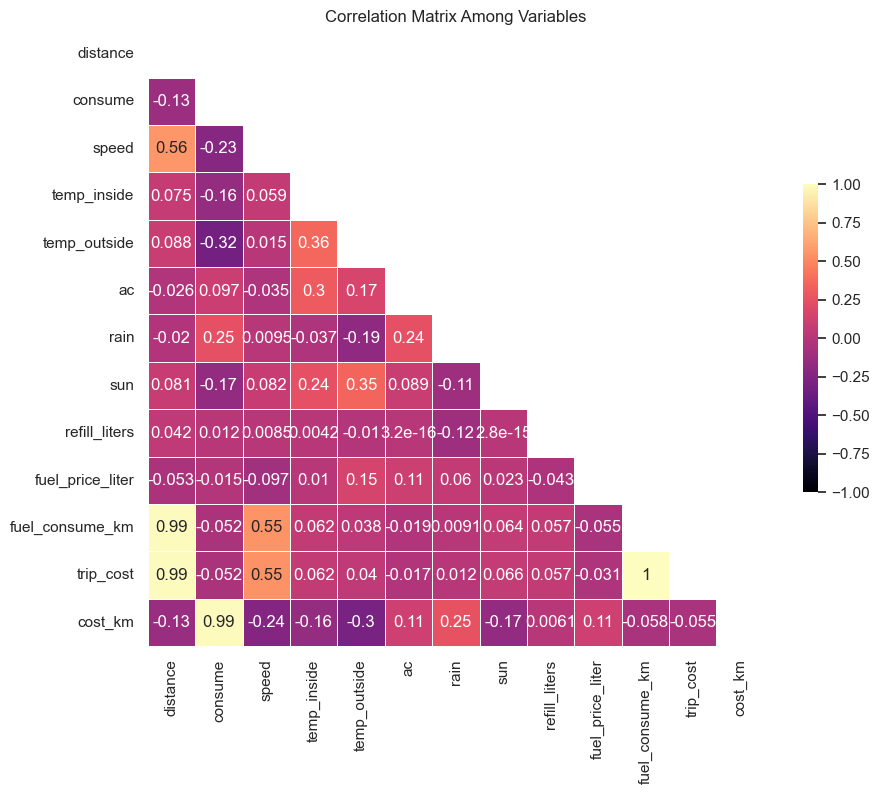

In [95]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
sns.set_theme(style="white")
cmap = 'magma'
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Among Variables")

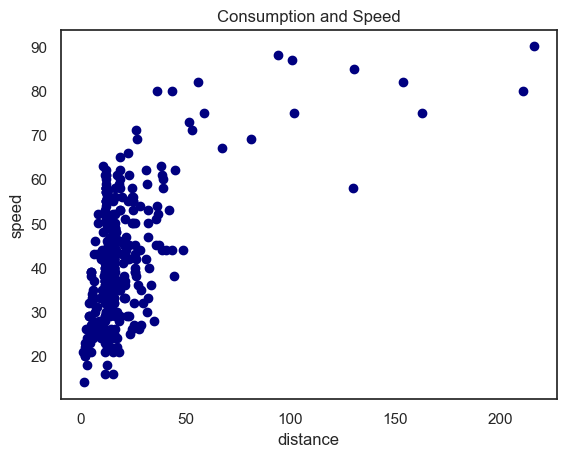

In [96]:
plt.scatter(x=data['distance'], y=data['speed'], color= '#000080')
plt.xlabel('distance')
plt.ylabel('speed')
plt.title('Consumption and Speed')
plt.show()

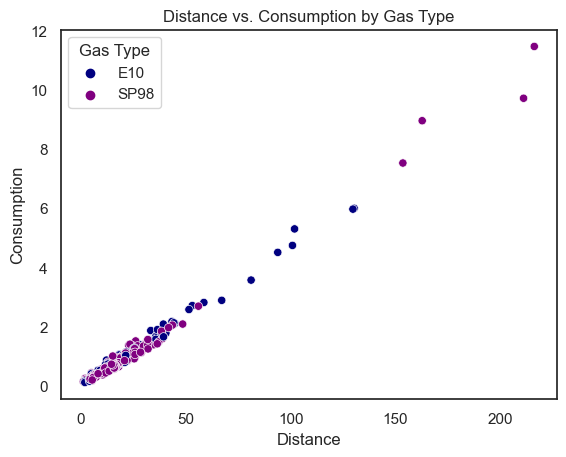

In [97]:
sns.scatterplot(x='distance', y='fuel_consume_km', hue='gas_type', data=data, palette={'E10': '#000080', 'SP98': 'purple'})
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.title('Distance vs. Consumption by Gas Type') 
plt.legend(title='Gas Type')
plt.show()

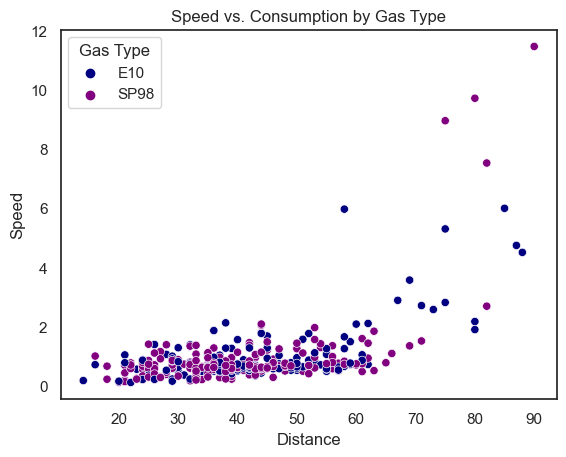

In [98]:
sns.scatterplot(x='speed', y='fuel_consume_km', hue='gas_type', data=data , palette={'E10': '#000080', 'SP98': 'purple'})
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed vs. Consumption by Gas Type') 
plt.legend(title='Gas Type')
plt.show()

In [99]:
mean_consume_by_c_ac = data[data['specials'] == 'AC'].groupby(['gas_type', 'specials'])['fuel_consume_km'].mean().reset_index()
mean_consume_by_c_ac

,gas_type,specials,fuel_consume_km
0,E10,AC,3.095600
1,SP98,AC,0.782208


In [100]:
# from sklearn.preprocessing import MinMaxScaler

# data_normalized = data.copy()
# columns_to_normalize = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'refill_liters', 'fuel_price_liter', 'fuel_consume_km', 'trip_cost', 'cost_km']
# scaler = MinMaxScaler()
# data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])
# data_normalized

In [101]:
# plt.scatter(x=data['distance'], y=data['speed'], color='#000080')
# plt.xlabel('distance')
# plt.ylabel('speed')
# plt.title('Consumption and Speed')
# plt.show()

In [102]:
# sns.scatterplot(x='speed', y='fuel_consume_km', hue='gas_type', data=data, palette={'E10': '#000080', 'SP98': 'purple'})
# plt.xlabel('Speed')
# plt.ylabel('Fuel Consumption (km)')
# plt.title('Speed vs. Fuel Consumption by Gas Type')
# plt.legend(title='Gas Type')
# plt.show()

**Conclusion: It is not necessary to normalize the data to graph, since there is no variation between the results in the visualizations, I continue to observe the clean data at the beginning, which is the data frame "Data"**

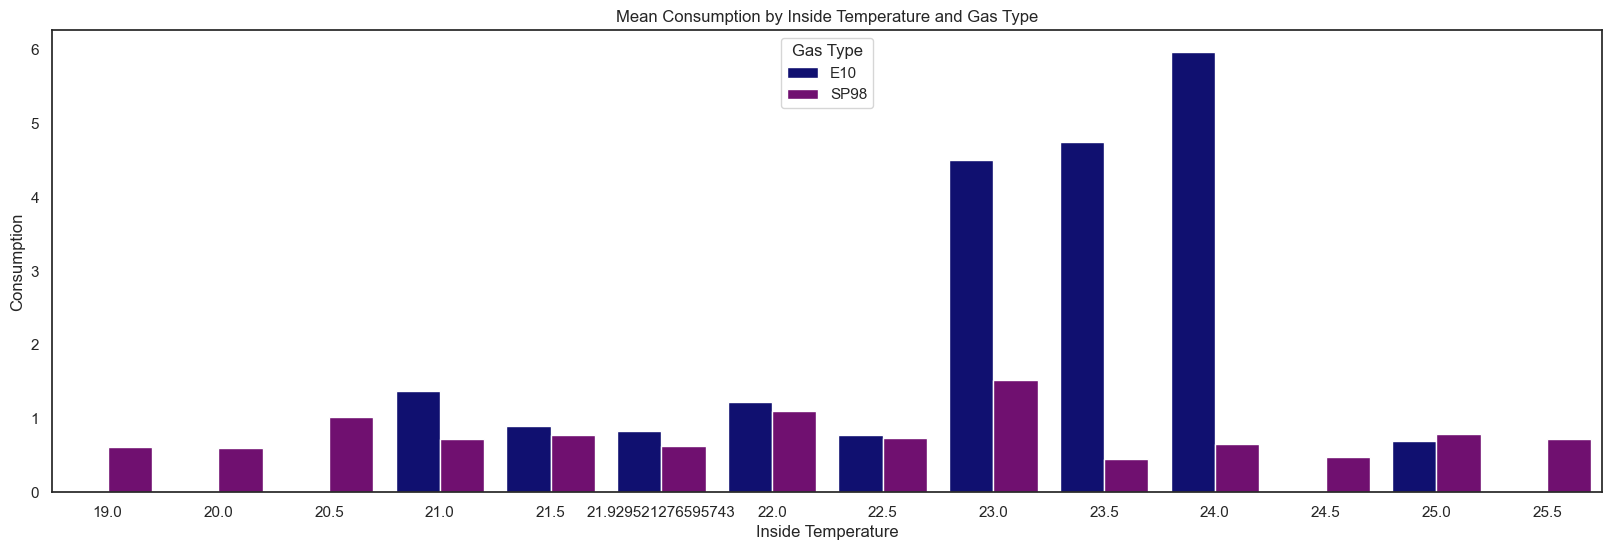

In [103]:
plt.figure(figsize=(20, 6))
sns.barplot(x='temp_inside', y='fuel_consume_km', hue='gas_type', data=mean_consumption_by_temp_inside_by_type, palette={'E10': '#000080', 'SP98': 'purple'})
plt.xlabel('Inside Temperature')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Inside Temperature and Gas Type')
plt.legend(title='Gas Type')
plt.show()

The consumption of gasoline SP98 has a normal performance between the different degrees of temperature, and E10 has a higher cost at a temperature of 23 to 24 degrees.

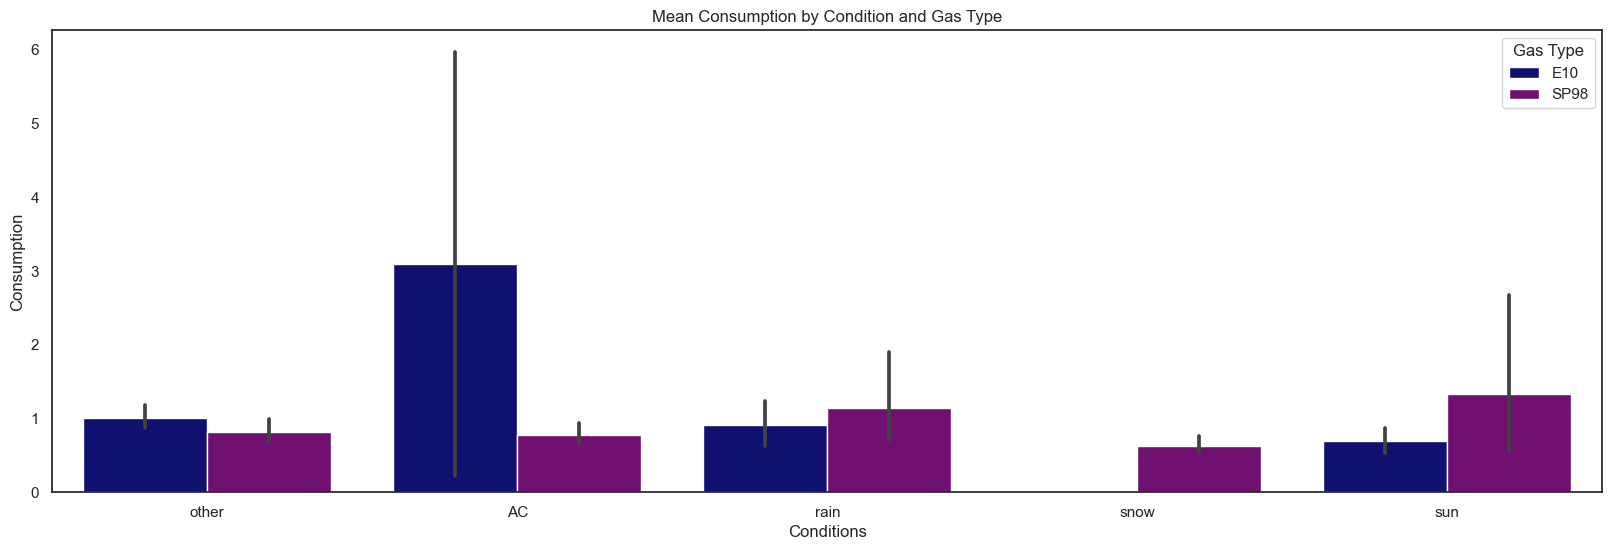

In [104]:
plt.figure(figsize=(20, 6))
sns.barplot(x='specials', y='fuel_consume_km', hue='gas_type', data=data, palette={'E10': '#000080', 'SP98': 'purple'})
plt.xlabel('Conditions')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Condition and Gas Type')
plt.legend(title='Gas Type')
plt.show()

In [105]:
def plot_histograms(data):
    numeric_columns = data.select_dtypes(include='number').columns
    
    for column in numeric_columns:
        plt.figure()
        data[column].hist()
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()


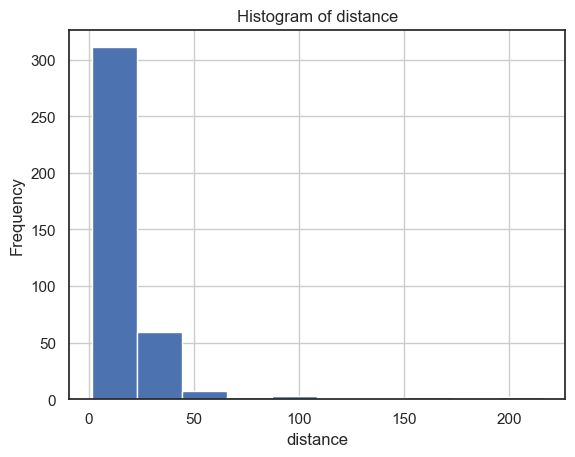

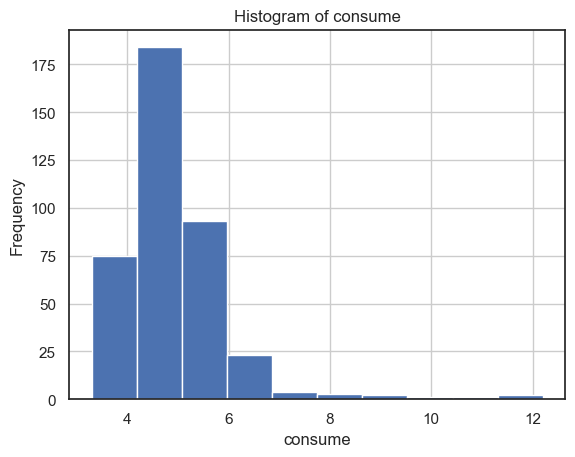

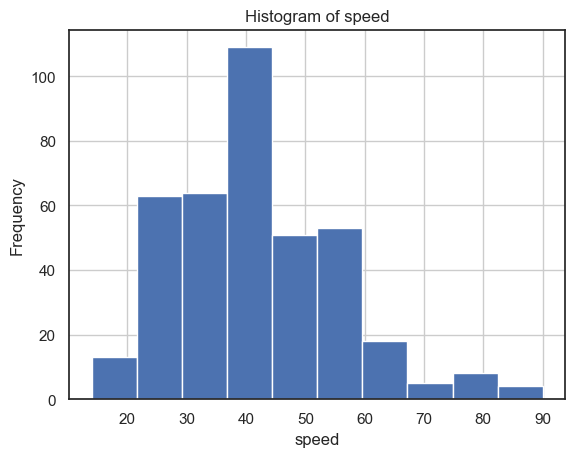

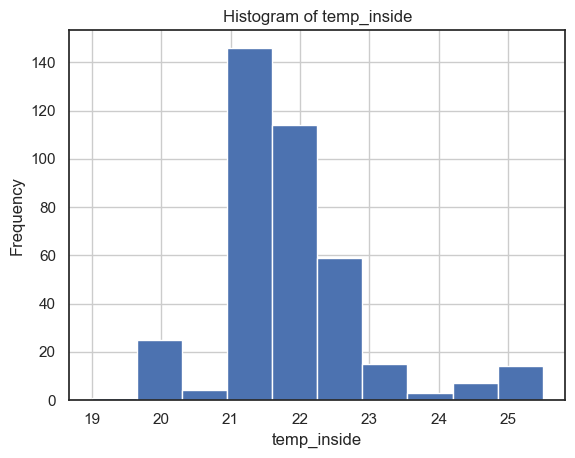

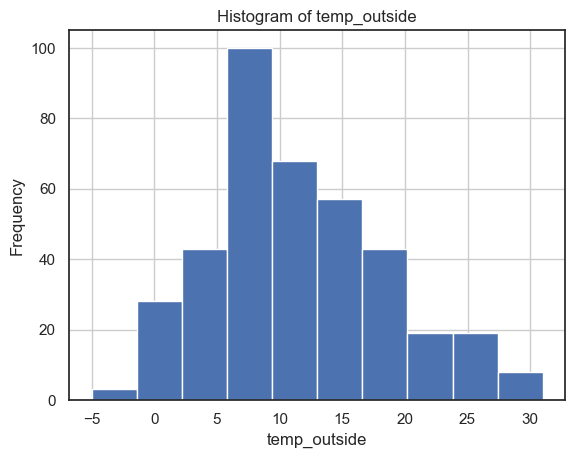

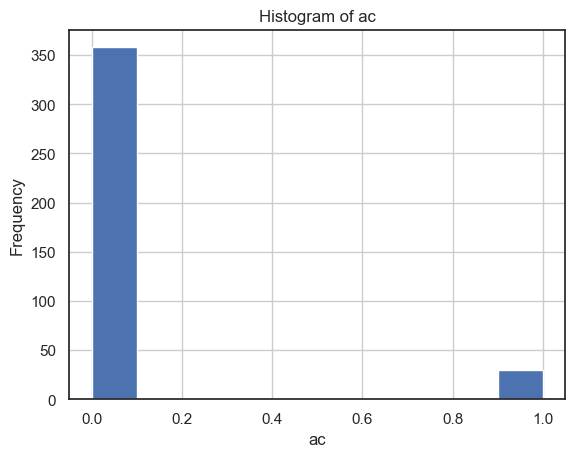

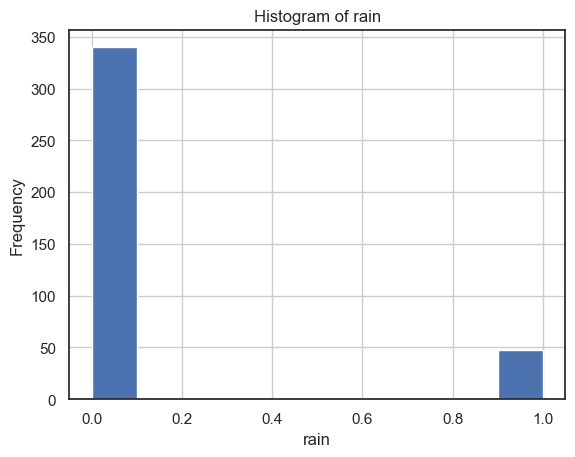

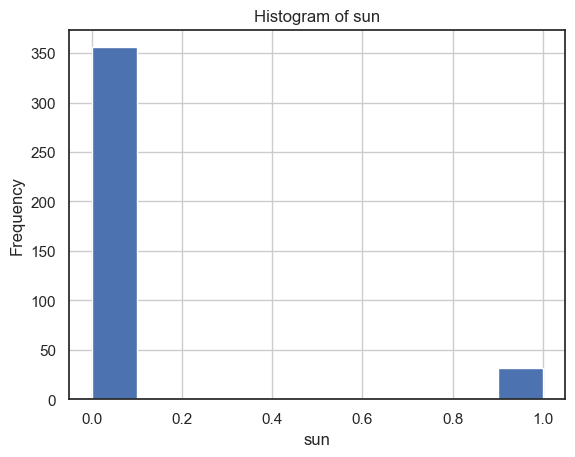

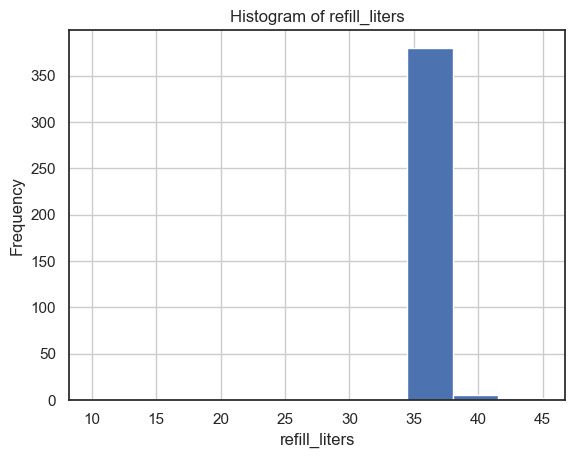

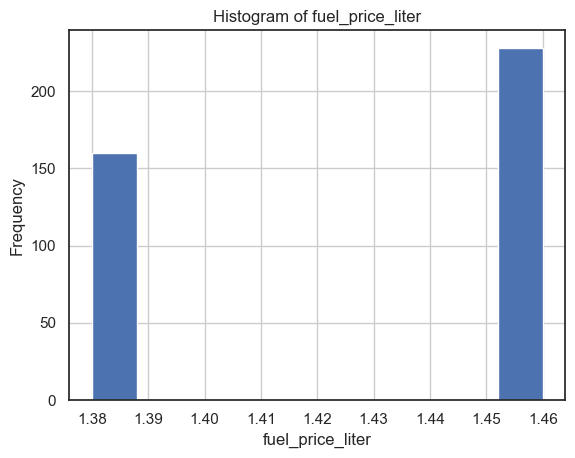

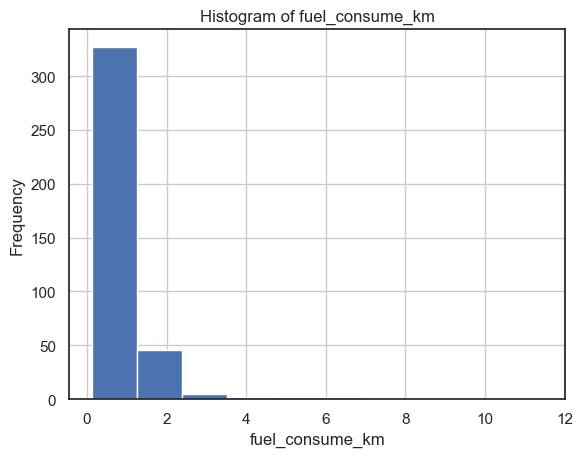

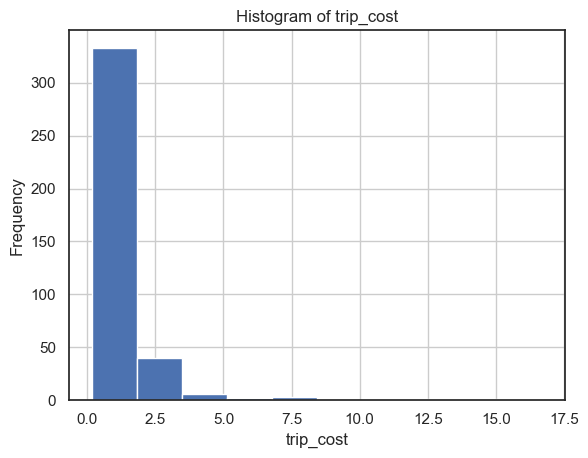

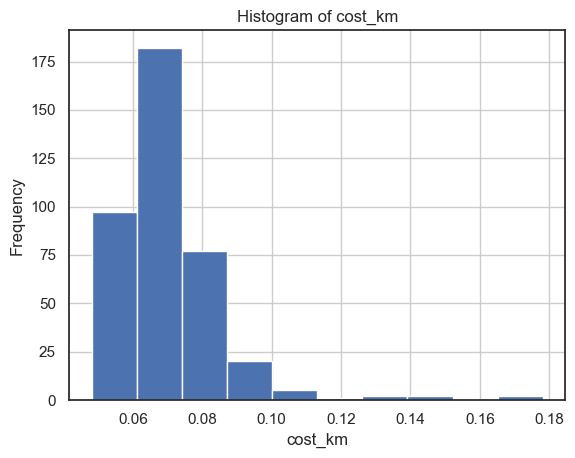

In [106]:
plot_histograms(data)

In [107]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,other,E10,0,0,0,45.000000,E10,1.38,1.4000,1.932000,0.06900
1,12.0,4.2,30,21.5,13,other,E10,0,0,0,37.115385,E10,1.38,0.5040,0.695520,0.05796
2,11.2,5.5,38,21.5,15,other,E10,0,0,0,37.115385,E10,1.38,0.6160,0.850080,0.07590
3,12.9,3.9,36,21.5,14,other,E10,0,0,0,37.115385,E10,1.38,0.5031,0.694278,0.05382
4,18.5,4.5,46,21.5,15,other,E10,0,0,0,37.115385,E10,1.38,0.8325,1.148850,0.06210


In [109]:
data.groupby('gas_type').agg({'cost_km':'mean', 'fuel_consume_km':'mean', 'distance':'mean'})

,cost_km,fuel_consume_km,distance
gas_type,,,
E10,0.068051,1.008933,21.096250
SP98,0.071527,0.883618,18.639912


In [115]:
grouped_data = data.groupby('gas_type').agg({'cost_km':'mean', 'fuel_consume_km':'mean', 'distance':'mean'})

best_cost_km = grouped_data['cost_km'].idxmin()
best_fuel_consume_km = grouped_data['fuel_consume_km'].idxmin()
best_distance = grouped_data['distance'].idxmax()

print(f"The best performance according to the cost per kilometer: {best_cost_km}")
print(f"The best performance according to fuel consumption per kilometer: {best_fuel_consume_km}")
print(f"The best performance according to distance: {best_distance}")

The best performance according to the cost per kilometer: E10
The best performance according to fuel consumption per kilometer: SP98
The best performance according to distance: E10


In [118]:
cost_km = data.groupby('gas_type')['cost_km'].mean()
distance = data.groupby('gas_type')['distance'].mean()

best_cost_km = cost_km.idxmin()
best_distance = distance.idxmax()

if best_cost_km == best_distance:
    best_gas_type = best_cost_km
else:
    best_gas_type = None

print("Cost per KM:")
print(cost_km)
print("\nAverage distance:")
print(distance)
print("\nBest type of gasoline based on cost per kilometer and distance:")
print(best_gas_type)

Cost per KM:
gas_type
E10     0.068051
SP98    0.071527
Name: cost_km, dtype: float64

Average distance:
gas_type
E10     21.096250
SP98    18.639912
Name: distance, dtype: float64

Best type of gasoline based on cost per kilometer and distance:
E10
